In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [14]:
df=pd.read_csv("churn.csv")
df

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [31]:
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [32]:
df.duplicated().sum()

0

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accountlength'>

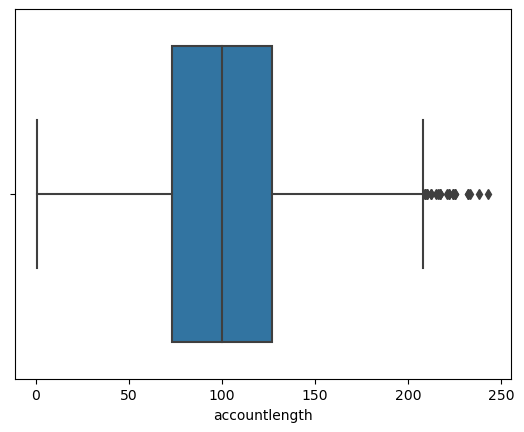

In [33]:
sns.boxplot(df["accountlength"])

In [44]:
x=df.iloc[:,1:]
x

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [43]:
y=df.iloc[:,0:1]
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,0
4998,0


In [19]:
x.shape[0]

5000

In [20]:
y.shape[1]

1

In [45]:
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=45,stratify=df.churn)

In [46]:
x_train

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1493,126,0,1,30,153.4,90,26.08,151.4,97,12.87,153.8,97,6.92,12.8,4,3.46,4
2237,88,0,0,0,166.7,61,28.34,179.3,88,15.24,242.7,131,10.92,6.8,7,1.84,4
539,59,0,0,0,107.8,113,18.33,216.6,125,18.41,217.5,92,9.79,9.9,3,2.67,2
2477,96,0,0,0,173.9,111,29.56,287.4,105,24.43,204.8,91,9.22,9.1,7,2.46,1
2388,161,0,0,0,297.9,141,50.64,238.1,107,20.24,240.5,93,10.82,8.9,5,2.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,69,1,0,0,176.8,89,30.06,196.0,89,16.66,232.6,151,10.47,13.1,5,3.54,1
254,97,1,0,0,143.7,117,24.43,273.0,82,23.21,178.3,81,8.02,10.9,3,2.94,0
3278,87,0,0,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2
2608,81,0,1,46,168.3,124,28.61,270.9,103,23.03,222.5,98,10.01,6.7,2,1.81,4


In [25]:
pd.options.display.max_columns=1500
pd.options.display.max_rows=1500

In [47]:
x_train.shape

(4000, 17)

In [48]:
x_test.shape

(1000, 17)

In [34]:
df.internationalplan.value_counts()

no     4527
yes     473
Name: internationalplan, dtype: int64

In [35]:
df.voicemailplan.value_counts()

no     3677
yes    1323
Name: voicemailplan, dtype: int64

In [36]:
df["internationalplan"]=df["internationalplan"].map({"yes":1, "no": 0})

In [37]:
df["voicemailplan"]=df["voicemailplan"].map({"yes":1, "no": 0})

In [38]:
df["churn"]=df["churn"].map({"Yes":1, "No": 0})

In [63]:
df.tail(50)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4950,0,152,0,0,0,189.5,108,32.22,218.4,69,18.56,291.1,81,13.10,11.0,2,2.97,3
4951,0,102,0,1,18,144.4,76,24.55,160.7,97,13.66,200.8,101,9.04,9.3,4,2.51,0
4952,0,110,0,0,0,170.1,87,28.92,216.6,98,18.41,225.0,88,10.13,10.8,3,2.92,2
4953,1,90,0,0,0,104.0,104,17.68,170.9,106,14.53,158.8,99,7.15,8.7,5,2.35,4
4954,0,130,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
4955,0,88,0,0,0,204.8,100,34.82,193.9,98,16.48,190.9,62,8.59,2.0,11,0.54,1
4956,0,97,0,0,0,197.8,122,33.63,208.2,147,17.70,106.3,115,4.78,15.1,4,4.08,1
4957,0,115,0,0,0,211.1,112,35.89,227.8,113,19.36,179.6,110,8.08,7.2,2,1.94,0
4958,0,88,0,0,0,202.6,139,34.44,210.7,123,17.91,81.1,86,3.65,9.8,8,2.65,1
4959,1,137,1,0,0,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,10.6,2,2.86,1


In [49]:
log=LogisticRegression()

In [50]:
log.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred=log.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
from sklearn import metrics

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       859
           1       0.53      0.07      0.12       141

    accuracy                           0.86      1000
   macro avg       0.70      0.53      0.52      1000
weighted avg       0.82      0.86      0.81      1000



In [55]:
x.columns

Index(['accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [57]:
log.predict([[128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [64]:
log.predict([[90,0,0,0,104.0,104,17.68,170.9,106,14.53,158.8,99,7.15,8.7,5,2.35,4]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [65]:
pickle.dump(log,open('model_churn.pkl','wb'))